### Exercici 1
#### Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [122]:
columnes= ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]
housing= pd.read_csv("/Users/esthersanroma/Desktop/DATA SCIENCES/housing data.csv", sep=',', names = columnes,encoding="latin-1",header=None)
house= pd.DataFrame(housing)

In [123]:
print(house)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

In [124]:
house.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

Anàlisis del dataset

1. CRIM:Taxa de delinqüència per càpita per municipis.
2. ZN:Proporció ZN de sòl residencial zonificat per a solars superiors
   25.000 peus quadrats.
3. INDUS:Proporció INDUS d'hectàrees comercials no minoristes per ciutat.
4. CHAS:Variable ficticia de CHAS Charles River (= 1 si els límits del 
   tracte riu; 0 en cas contrari)
5. NOX:Concentració d'òxids nítrics de NOX (parts per 10 milions)
6. RM:nombre mitjà d'habitacions per habitatge
7. AGE:Proporció d'EDAT de les unitats ocupades pel propietari construïdes
   abans de 1940
8. DIS:Distàncies ponderades DIS fins a cinc centres d'ocupació de Boston       
9. RAD:Índex RAD d'accessibilitat a les carreteres radials
10.TAX:Impost de valor total de l'impost sobre la propietat per 10.000 $
11.PTRATIO:Ràtio alumnes-professor per municipis
12.B:1000(Bk - 0,63)^2 on Bk és la proporció de negres per poble
13.LSTAT:% d'estatus inferior de la població
14.MEDV:Valor mitjà de les cases ocupades pel propietari en 1.000 dòlars

In [125]:
house.shape

(506, 14)

In [126]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [127]:
house.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [128]:
house.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


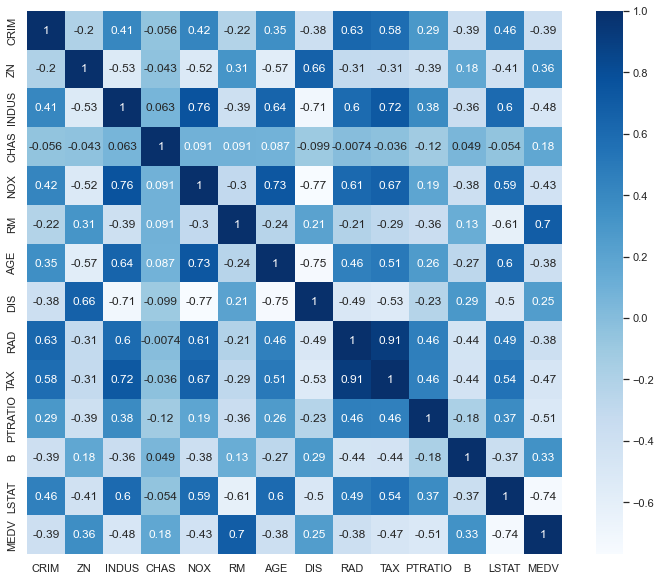

In [129]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(house.corr(),cmap="Blues", annot=True);

Fem un gràfic "LSTAT",“MEDV” i tambè "MEDV", "RM". Son dos variables que tenen molta correlació amb MEDV

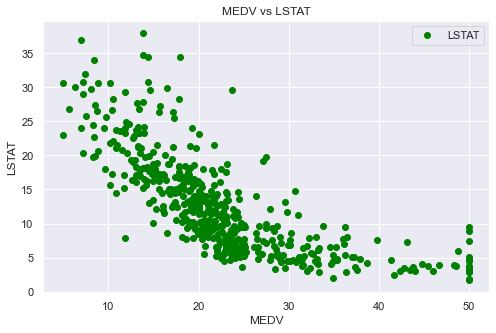

In [130]:
house.plot(x='MEDV', y='LSTAT', style='o', color= "green") 
plt.title('MEDV vs LSTAT') 
plt.xlabel('MEDV') 
plt.ylabel('LSTAT') 
plt.show()

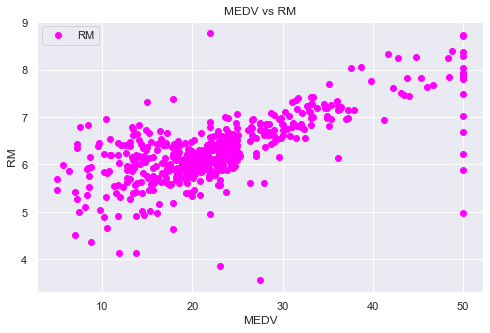

In [131]:
house.plot(x='MEDV', y='RM', style='o', color= "magenta") 
plt.title('MEDV vs RM') 
plt.xlabel('MEDV') 
plt.ylabel('RM') 
plt.show()

Fem una gràfica boxplot per saber si hi han outliers.

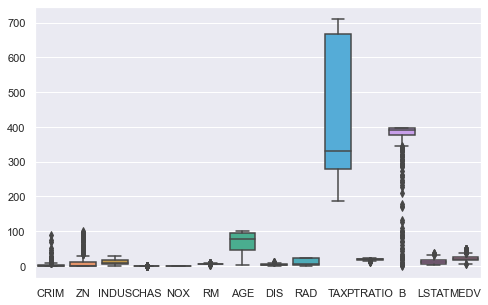

In [221]:
sns.boxplot(data=house)
sns.set(rc = {'figure.figsize':(20,20)})

<Figure size 576x360 with 0 Axes>

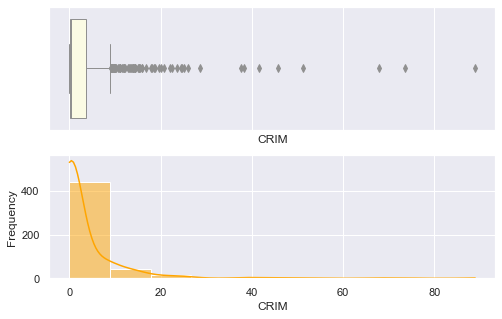

<Figure size 576x360 with 0 Axes>

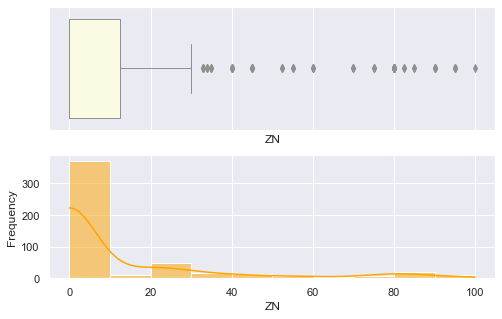

<Figure size 576x360 with 0 Axes>

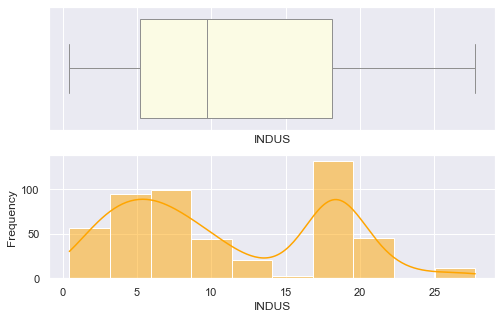

<Figure size 576x360 with 0 Axes>

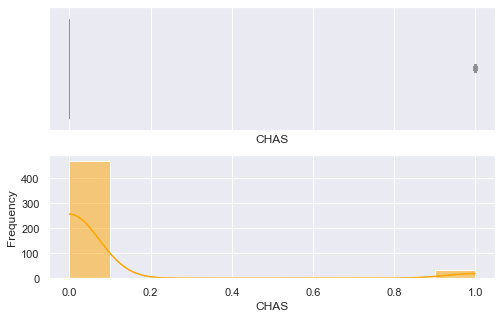

<Figure size 576x360 with 0 Axes>

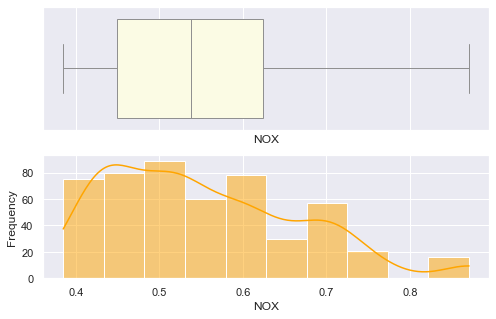

<Figure size 576x360 with 0 Axes>

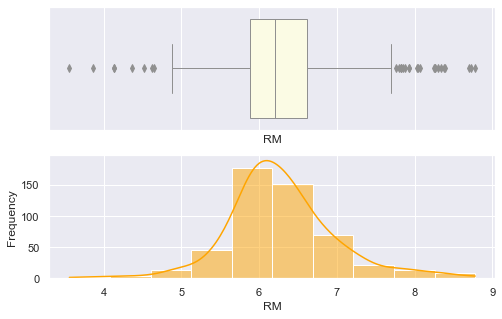

<Figure size 576x360 with 0 Axes>

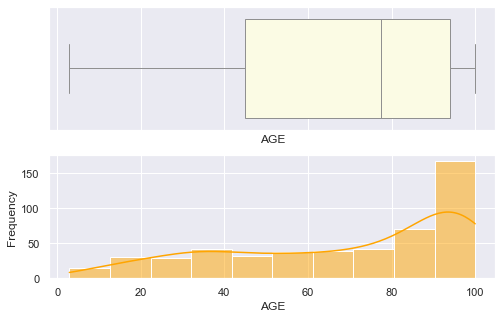

<Figure size 576x360 with 0 Axes>

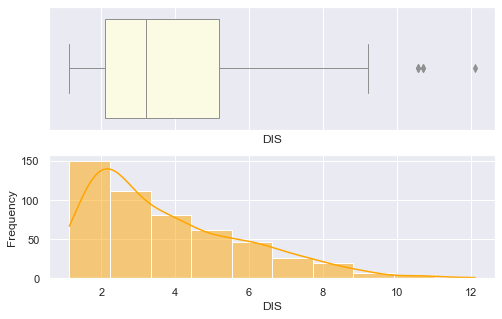

<Figure size 576x360 with 0 Axes>

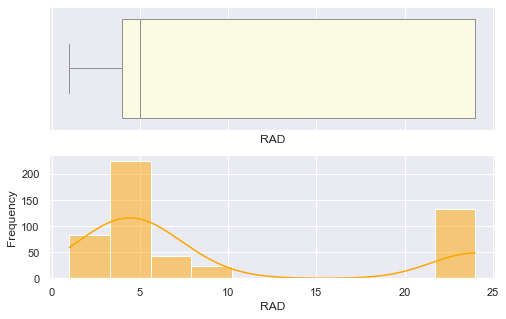

<Figure size 576x360 with 0 Axes>

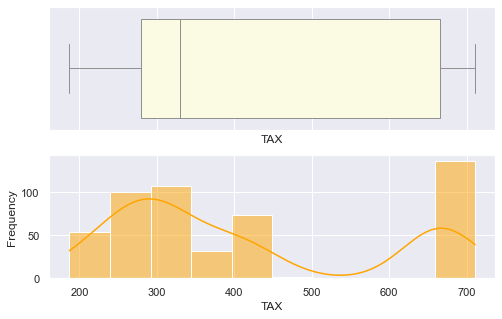

<Figure size 576x360 with 0 Axes>

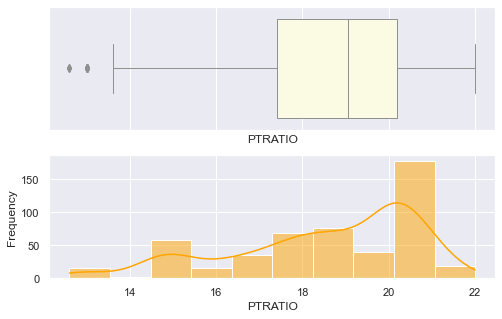

<Figure size 576x360 with 0 Axes>

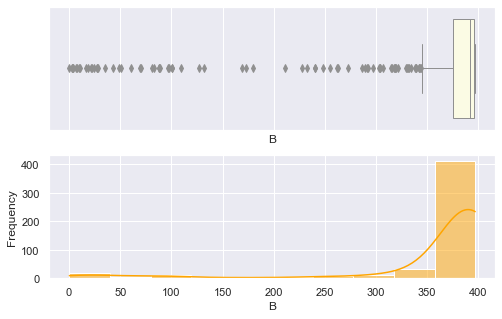

<Figure size 576x360 with 0 Axes>

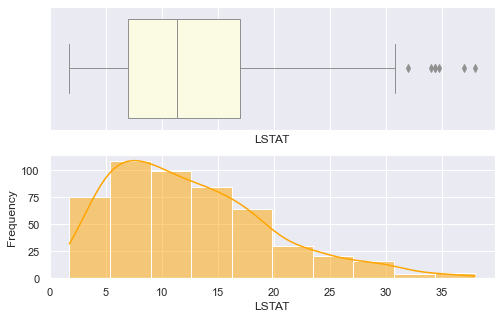

<Figure size 576x360 with 0 Axes>

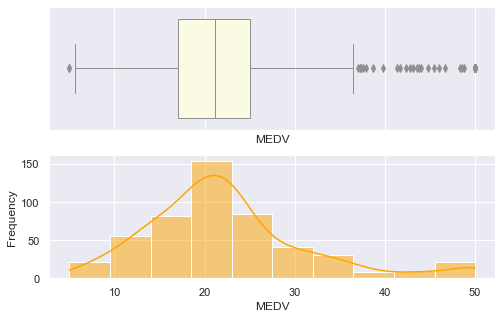

In [218]:
for i in house.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8,5)})
    f,(ax_box,ax_hist)=plt.subplots(2,sharex=True)
    plt.gca().set(xlabel=i,ylabel="Frequency")
    sns.boxplot(house[i], ax=ax_box, linewidth=1.0, color="lightyellow")
    sns.histplot(house[i],ax=ax_hist, bins=10, kde=True, color="orange")

In [134]:
from scipy import stats
from scipy.stats import shapiro
for columns in house:
  stat, p = shapiro(house[columns])
  print('stat=%.3f, p=%.3f' % (stat, p))
  if p > 0.05:
	  print(' SI Gaussià,'+ columns)
  else:
	  print(' NO Gaussià,' + columns)
     

stat=0.450, p=0.000
 NO Gaussià,CRIM
stat=0.556, p=0.000
 NO Gaussià,ZN
stat=0.900, p=0.000
 NO Gaussià,INDUS
stat=0.275, p=0.000
 NO Gaussià,CHAS
stat=0.936, p=0.000
 NO Gaussià,NOX
stat=0.961, p=0.000
 NO Gaussià,RM
stat=0.892, p=0.000
 NO Gaussià,AGE
stat=0.903, p=0.000
 NO Gaussià,DIS
stat=0.680, p=0.000
 NO Gaussià,RAD
stat=0.815, p=0.000
 NO Gaussià,TAX
stat=0.904, p=0.000
 NO Gaussià,PTRATIO
stat=0.477, p=0.000
 NO Gaussià,B
stat=0.937, p=0.000
 NO Gaussià,LSTAT
stat=0.917, p=0.000
 NO Gaussià,MEDV


Per processar les dades farem:
Robust Scaler
Outliers: Crim, Zn, Chas, RM, DIS, PTRATIO, B, LSTAT, MEDV.
MinMax Scaler
No normal: INDUS, NOX, AGE, RAD, TAX.

In [135]:
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [136]:
house00=house.copy()
columnes_Rb = ["CRIM", "ZN", "CHAS", "RM", "DIS", "PTRATIO", "B", "LSTAT", "MEDV"]
columnes_mM = ["INDUS", "NOX", "AGE", "RAD", "TAX"]
scalerRobust= preprocessing.RobustScaler().fit(house00[columnes_Rb])
house00[columnes_Rb] = scalerRobust.transform(house00[columnes_Rb])
scalerNorm= preprocessing.MinMaxScaler().fit(house00[columnes_mM])
house00[columnes_mM]= scalerNorm.transform(house00[columnes_mM])
house00.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.069593,1.44,0.067815,0.0,0.314815,0.496612,0.641607,0.285777,0.000000,0.208015,-1.339286,0.261902,-0.637681,0.351097
1,-0.063755,0.00,0.242302,0.0,0.172840,0.287940,0.782698,0.569789,0.043478,0.104962,-0.446429,0.261902,-0.221889,0.050157
2,-0.063760,0.00,0.242302,0.0,0.172840,1.323171,0.599382,0.569789,0.043478,0.104962,-0.446429,0.066675,-0.732634,1.692790
3,-0.062347,0.00,0.063050,0.0,0.150206,1.069783,0.441813,0.924391,0.086957,0.066794,-0.125000,0.153016,-0.841579,1.529781
4,-0.052144,0.00,0.063050,0.0,0.150206,1.271680,0.528321,0.924391,0.086957,0.066794,-0.125000,0.261902,-0.602699,1.880878


Hem normalitzat les dades utilitzant la tècnica "RobustScaler", despres ho hem fet minmax scaler .  Hem fet un robust scaler per tractar els outliers i un min-max scaler per ajustar les dades dins d'un rang específic.
Això ens permet que les dades estiguin escalades i estiguin dins d'un rang específic, i així evitar que cap variable tingui un pes més gran en la predicció.
Ja podem procedir a entrenar els models de regressió amb les dades normalitzades, podem fer la divisió de dades de train i test , utilitzant X_scaled_minmax com a conjunt de dades processades. 

<Figure size 576x360 with 0 Axes>

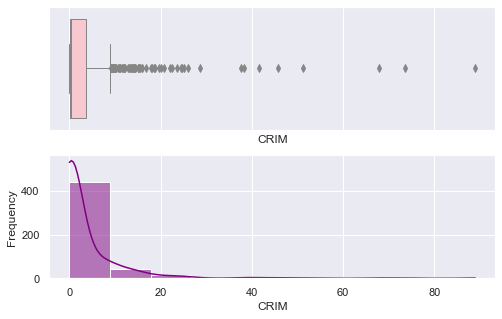

<Figure size 576x360 with 0 Axes>

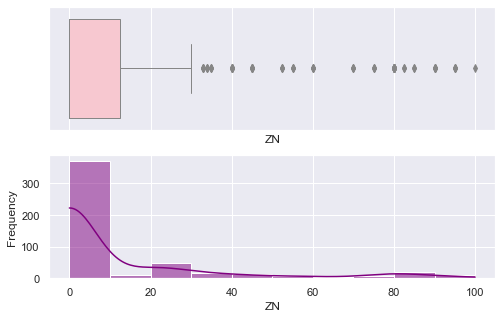

<Figure size 576x360 with 0 Axes>

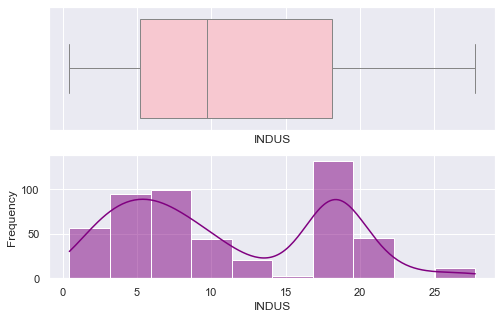

<Figure size 576x360 with 0 Axes>

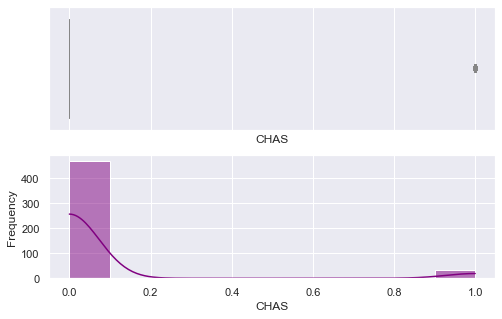

<Figure size 576x360 with 0 Axes>

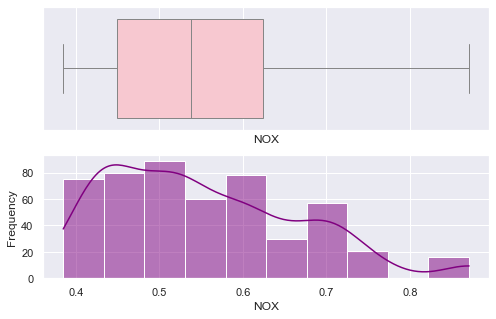

<Figure size 576x360 with 0 Axes>

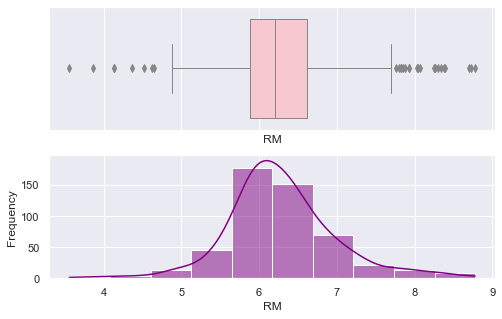

<Figure size 576x360 with 0 Axes>

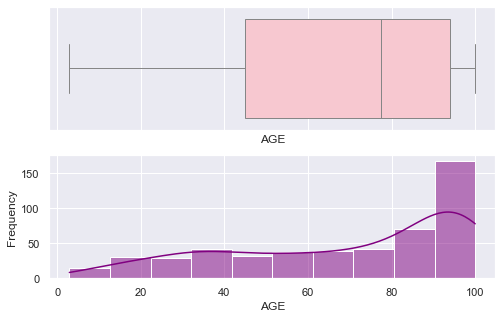

<Figure size 576x360 with 0 Axes>

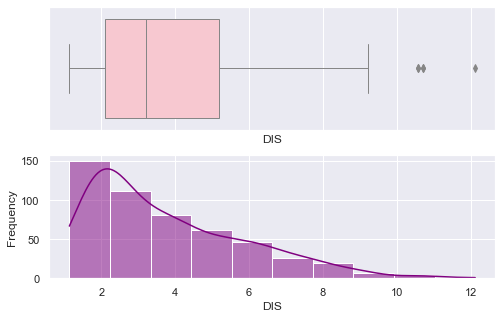

<Figure size 576x360 with 0 Axes>

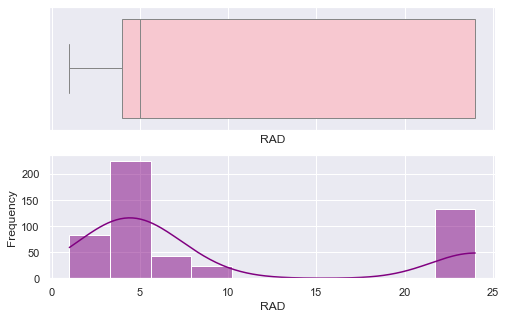

<Figure size 576x360 with 0 Axes>

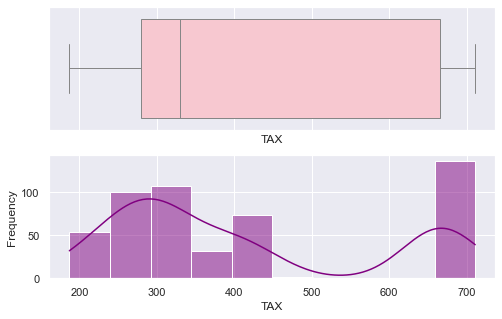

<Figure size 576x360 with 0 Axes>

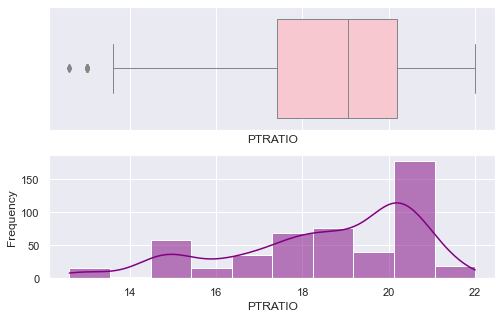

<Figure size 576x360 with 0 Axes>

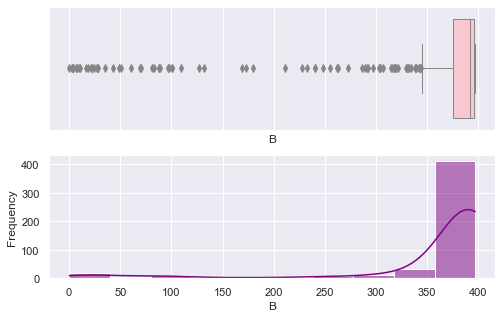

<Figure size 576x360 with 0 Axes>

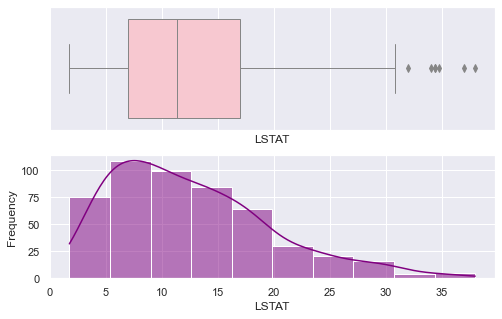

<Figure size 576x360 with 0 Axes>

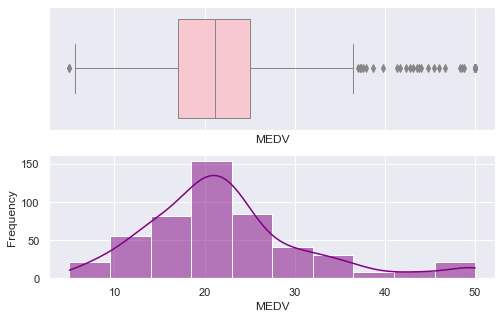

In [215]:
for i in house00.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8,5)})
    f,(ax_box,ax_hist)=plt.subplots(2,sharex=True)
    plt.gca().set(xlabel=i,ylabel="Frequency")
    sns.boxplot(house[i], ax=ax_box, linewidth=1.0, color="pink")
    sns.histplot(house[i],ax=ax_hist, bins=10, kde=True, color="purple")

In [137]:
from sklearn.model_selection import train_test_split

In [222]:
X= house00.drop(["MEDV"], axis=1)
y = house00["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [223]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


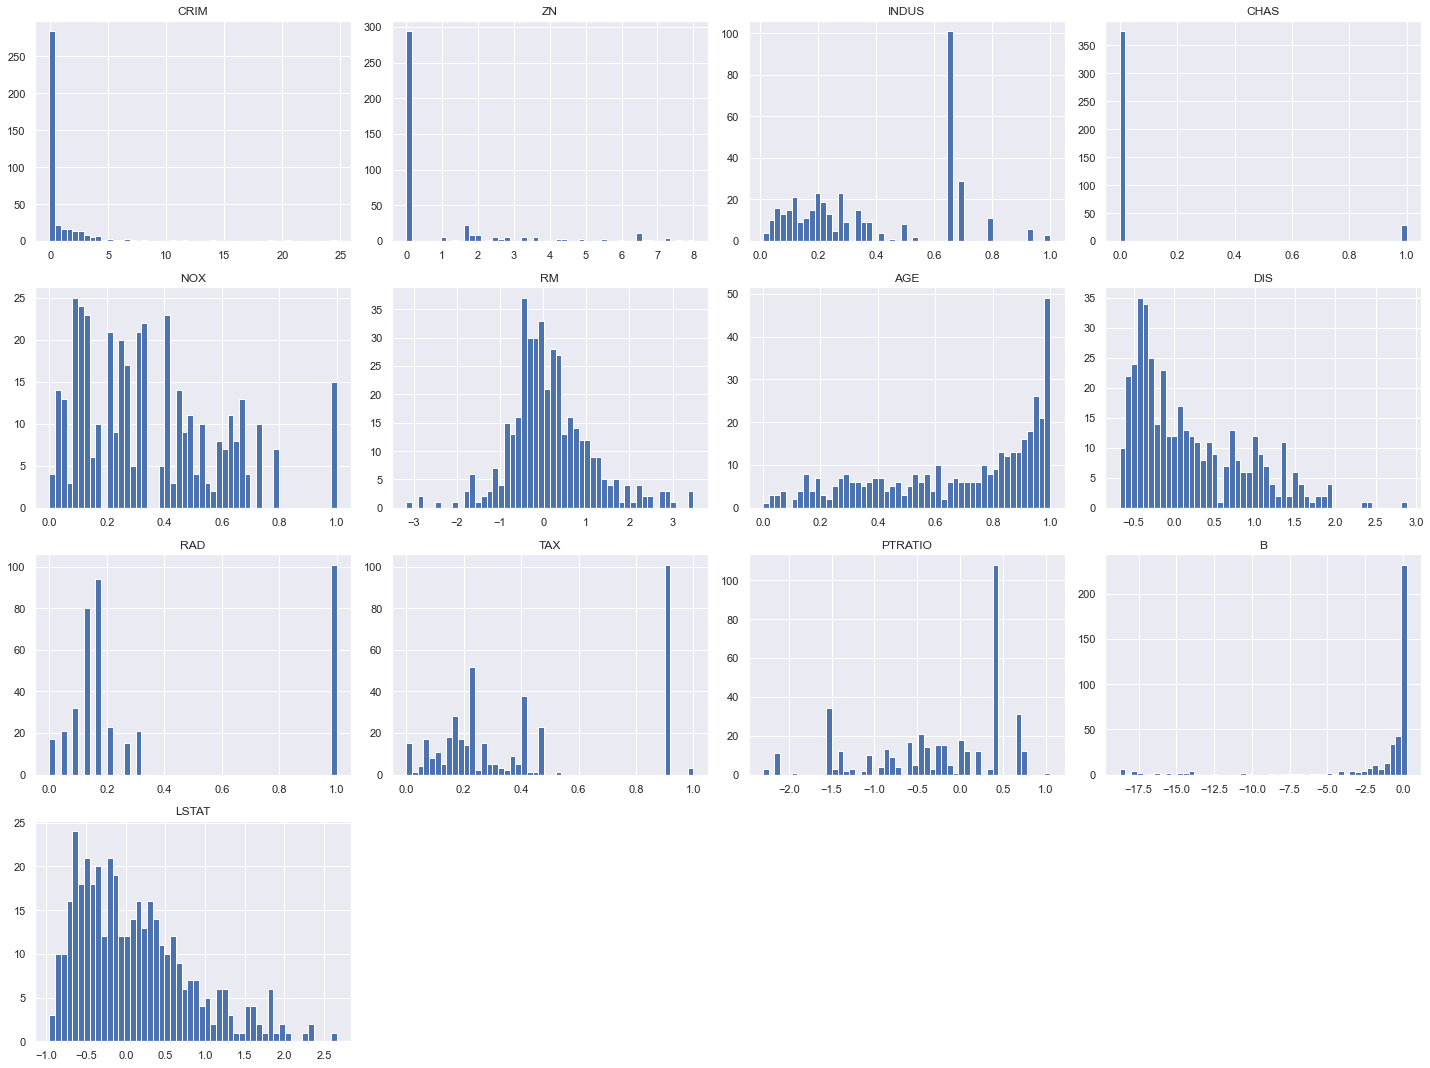

In [224]:
X_train.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

El train-test split es fa per fer el primer pas per separar les dades en dos conjunts, un per entrenar el model i un altre per testar-lo. 

Després de fer la divisió, es pot aplicar diferents models de regressió per intentar predir el millor possible el preu de les vivendes (MEDV). Aquesta aplicació es pot fer utilitzant les dades d'entrenament per entrenar els diferents models i després utilitzar les dades de test per avaluar les seves prestacions.

In [140]:
print(np.shape(X_train))
print(np.shape(y_train))

(404, 13)
(404,)


LINEAR REGRESSION

In [141]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
y_pred_LR= model_LR.predict(X_test)

In [142]:
y_test = np.array(y_test)
y_pred_LR = np.array(y_pred_LR)
house01= pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_LR.flatten()})
house01

,Actual,Predicted
0,0.300940,0.977646
1,1.404389,1.859005
2,-0.952978,-0.800383
3,0.200627,0.480499
4,-0.639498,-0.304717
...,...,...
97,-0.413793,-2.678901
98,-1.454545,-0.942336
99,-0.501567,-0.629016
100,0.163009,0.134949


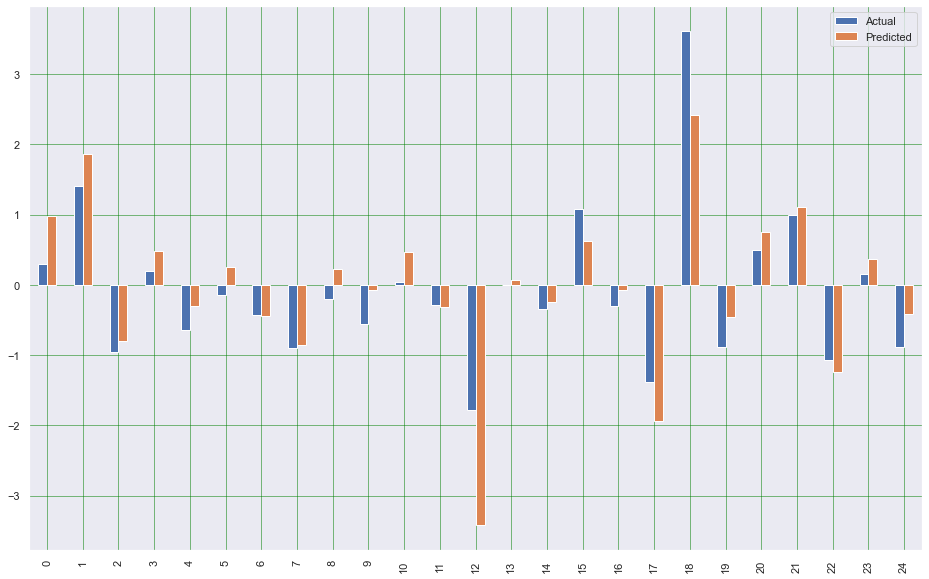

In [143]:
house02=house01.head(25)
house02.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [144]:
coeff_house = pd.DataFrame(model_LR.coef_, X.columns, columns=['Coefficient']) 
coeff_house

,Coefficient
CRIM,-0.050964
ZN,0.047195
INDUS,0.138130
CHAS,0.349146
NOX,-1.048336
RM,0.410766
AGE,-0.076662
DIS,-0.560673
RAD,0.756851
TAX,-0.699551


El valor absolut del coeficient indica la força de la relació.
El coeficient per a RM és positivament 21.825753, el que indica que hi ha una relació positiva entre RM i MEDV. Això significa que a mesura que augmenta el valor de RM, el valor de MEDV també augmenta. El coeficient és altament rellevant, el que indica que RM és una característica important per al model.
El resultat de LSTAT -18.430628 significa que l'augment d'1 unitat en la variable LSTAT (percentatge de propietaris amb baix ingrés) es relaciona amb una disminució de 18.430628 en el preu de la casa (MEDV).

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

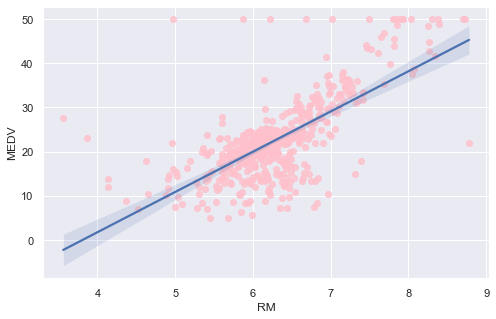

In [145]:
sns.regplot(x='RM', y='MEDV', data=house, scatter_kws={'color': 'pink'})

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

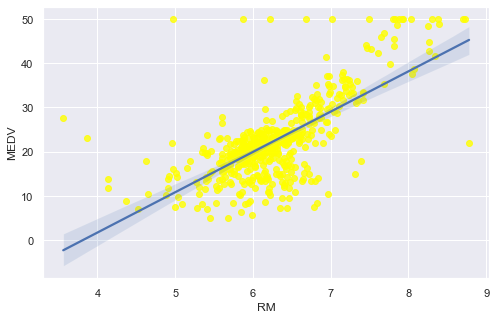

In [146]:
sns.regplot(x='RM', y='MEDV', data=house, scatter_kws={'color': 'yellow'})

Podem utilitzar diferents mètriques per avaluar el rendiment del model, com el MSE (Mean Squared Error) o el R2 (coeficient de determinació)

In [147]:
from sklearn.metrics import mean_squared_error, r2_score
mse_LR = mean_squared_error(y_test, y_pred_LR)
r2_LR = r2_score(y_test, y_pred_LR)
print("MSE_LR:", mse_LR)
print("R2_LR:", r2_LR)

MSE_LR: 0.3819320875380311
R2_LR: 0.6687594935356322


Aquests resultats indiquen que el model de regressió lineal té una precisió moderada. El MSE mesura la diferència entre les dades observades i les dades predites, i un valor més baix indica una millor precisió. El R2 mesura la proporció de variació de les dades observades que es pot explicar per les dades predites, i un valor més proper a 1 indica una millor precisió. En aquest cas, el MSE és relativament alt i el R2 és moderat, però pot ser millorat en utilitzar altres tècniques

TREE REGRESSOR

In [148]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [149]:
tree_model = DecisionTreeRegressor(max_depth=3, min_samples_split=5, min_samples_leaf=3)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

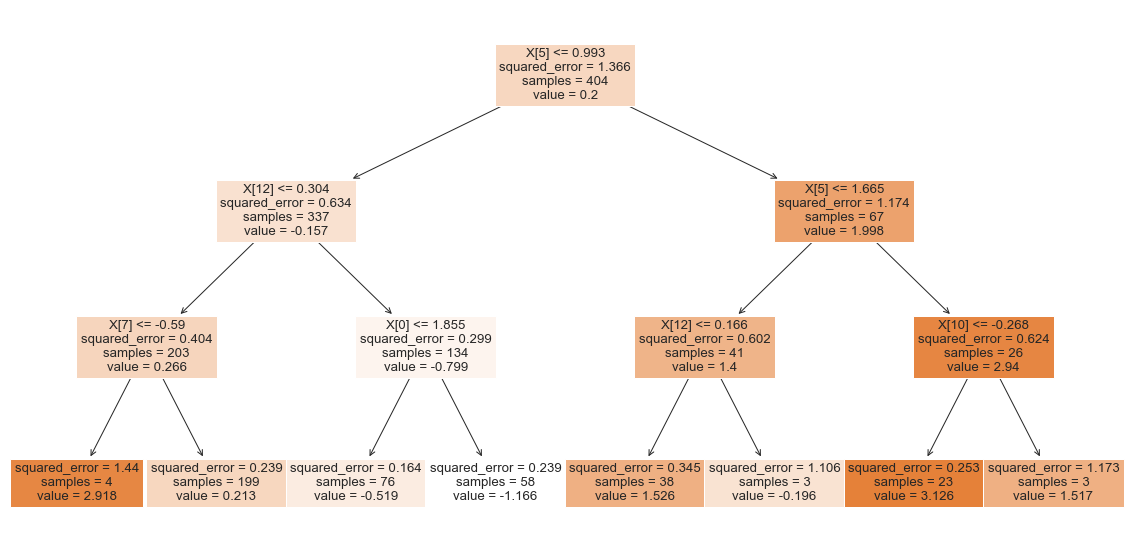

In [150]:
plt.figure(figsize=(20,10))
plt = plot_tree(tree_model, filled=True)
plot=feature_names = list(house00.drop(columns = "MEDV").columns)

In [151]:
print(f"Profundidad de l'arbre: {tree_model.get_depth()}")
print(f"Número de nodes terminals: {tree_model.get_n_leaves()}")

Profundidad de l'arbre: 3
Número de nodes terminals: 8


In [152]:
from sklearn.tree import export_text

In [153]:
text_model = export_text(
                    decision_tree = tree_model,
                    feature_names = list(house00.drop(columns = "MEDV").columns)
               )
print(text_model)

|--- RM <= 0.99
|   |--- LSTAT <= 0.30
|   |   |--- DIS <= -0.59
|   |   |   |--- value: [2.92]
|   |   |--- DIS >  -0.59
|   |   |   |--- value: [0.21]
|   |--- LSTAT >  0.30
|   |   |--- CRIM <= 1.86
|   |   |   |--- value: [-0.52]
|   |   |--- CRIM >  1.86
|   |   |   |--- value: [-1.17]
|--- RM >  0.99
|   |--- RM <= 1.66
|   |   |--- LSTAT <= 0.17
|   |   |   |--- value: [1.53]
|   |   |--- LSTAT >  0.17
|   |   |   |--- value: [-0.20]
|   |--- RM >  1.66
|   |   |--- PTRATIO <= -0.27
|   |   |   |--- value: [3.13]
|   |   |--- PTRATIO >  -0.27
|   |   |   |--- value: [1.52]



 model_tree prediu un valor de mitjana 2,92  per habitatges que estan una zona amb : RM <= 0,99, un LSTAT <= 0.30 y un DIS <= 0.59

In [154]:
importancia_predictors = pd.DataFrame(
                            {'predictor': house00.drop(columns = "MEDV").columns,
                             'importancia': tree_model.feature_importances_}
                            )
print("Importancia dels predictors")
importancia_predictors.sort_values('importancia', ascending=False)

Importancia dels predictors


,predictor,importancia
5,RM,0.665857
12,LSTAT,0.223646
7,DIS,0.064284
0,CRIM,0.030827
10,PTRATIO,0.015386
1,ZN,0.000000
2,INDUS,0.000000
3,CHAS,0.000000
4,NOX,0.000000
6,AGE,0.000000


RM és el predictor  més important seguit de LSTAT

In [179]:
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print("MSE_tree:", mse_tree)
print("R2_tree:",r2_tree )

MSE_tree: 0.21375201230138813
R2_tree: 0.8146180247150894


### Exercici 2
#### Compara’ls en base al MSE i al R2.

In [156]:
print("MSE_LR:", mse_LR)
print("R2_LR:", r2_LR)
print("MSE_tree:", mse_tree)
print("R2_tree:",r2_tree )

MSE_LR: 0.3819320875380311
R2_LR: 0.6687594935356322
MSE_tree: 0.21375201230138813
R2_tree: 0.8146180247150894


In [157]:
R2_MSE = pd.DataFrame( data = [['Linear Regression', r2_LR, mse_LR],
                                  ['Decision Tree Regressor', r2_tree, mse_tree]],
                                  columns = ['Model', 'R2', 'MSE'])
R2_MSE.head()

,Model,R2,MSE
0,Linear Regression,0.668759,0.381932
1,Decision Tree Regressor,0.814618,0.213752


Decision Tree Regressor obtè millors resultats.

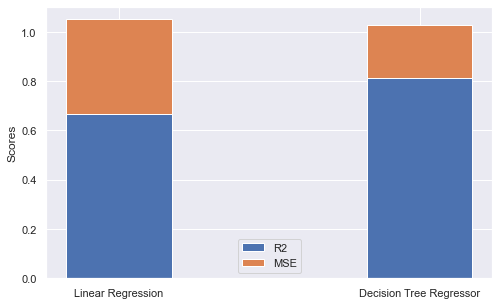

In [186]:
models = R2_MSE['Model']
r2 = R2_MSE['R2']
mse = R2_MSE['MSE']

bar_width = 0.35
fig, ax = plt.subplots()
bar1 = ax.bar(models, r2, bar_width, label='R2')
bar2 = ax.bar(models, mse, bar_width, label='MSE', bottom=r2)
ax.set_ylabel('Scores')
ax.legend()
plt.show()

La puntuació R2 oscil·la entre -1 i 1, on 1 és un ajust perfecte i -1 és un ajust dolent. El MSE és la mitjana de les diferències al quadrat entre els valors objectiu previstos i reals. Els valors de MSE més baixos indiquen un millor ajust. Decision Tree Regressor ens donar millor resultats.

### Exercici 3
#### Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

 GridSearchCV per automatitzar el procés de cerca de valors òptims del paràmetre i, un cop entrenat el model, es crea una figura amb un subplot on es representen les dades obtingudes en forma de gràfic de línies. A través d'aquest gràfic es pot veure com el punt amb millor puntuació en les dades de validació cruzada (puntuació mitjana de test) està associat a un valor específic del paràmetre ccp_alpha.

In [207]:
from sklearn.model_selection import GridSearchCV

In [208]:
parameters = {'ccp_alpha':[0.0, 0.001, 0.01, 0.1, 1]}

regressor = DecisionTreeRegressor()
grid = GridSearchCV(estimator=regressor, param_grid=parameters, cv=3)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
best_model

DecisionTreeRegressor(ccp_alpha=0.001)

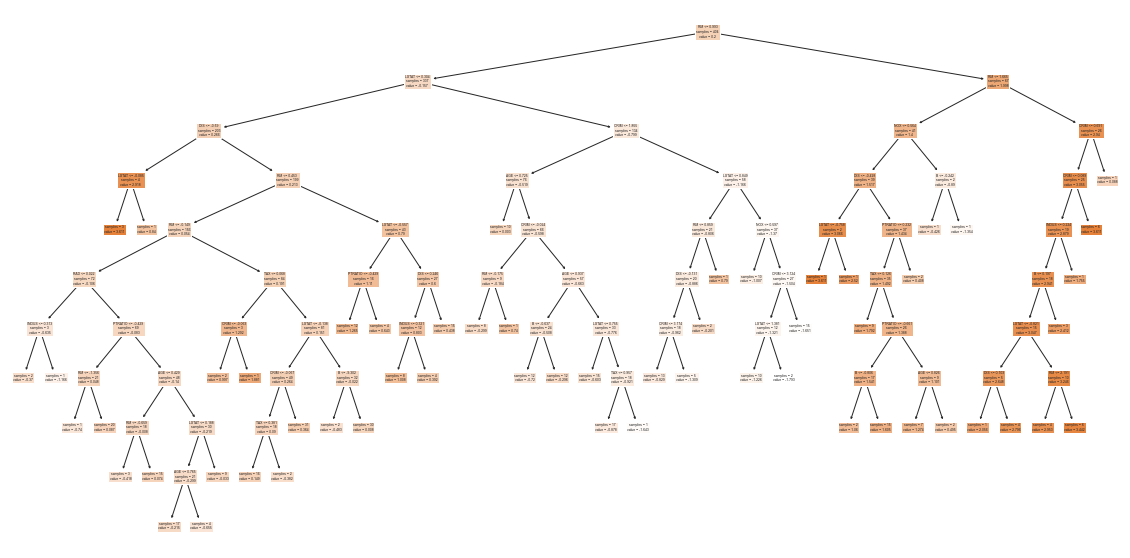

In [209]:
fig, ax = plt.subplots(figsize=(20, 10))
plot = plot_tree(
            decision_tree = best_model,
            feature_names = columnes,
            class_names   = 'MEDV',
            filled        = True,
            impurity      = False,
            ax            = ax
       )

In [210]:
grid.best_params_

{'ccp_alpha': 0.001}

### Exercici 4
#### Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

In [211]:
mse_before = mean_squared_error(y_test, y_pred_tree)
r2_before = r2_score(y_test, y_pred_tree)
print(mse_before,r2_before)

0.21375201230138813 0.8146180247150894


In [181]:
from sklearn.model_selection import cross_val_score

In [212]:
scores_r2 = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2')
r2_after = np.mean(scores_r2)
scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_after = -np.mean(scores)
print(mse_after, r2_after)

0.40613784344119785 0.6789194498580606


In [213]:
print("MSE abans de la validació: ", mse_before)
print("MSE després de la validació: ", mse_after)
print("R2 abans de la validació: ", r2_before)
print("R2 després de la validació: ", r2_after)

MSE abans de la validació:  0.21375201230138813
MSE després de la validació:  0.40613784344119785
R2 abans de la validació:  0.8146180247150894
R2 després de la validació:  0.6789194498580606


A partir d'aquests resultats, es pot veure que No hi ha una millora  en les mètriques d'avaluació del model després de fer la validació. El MSE (error quadràtic mitjà) ha augmentat, passant de 0,21 a 0.40, i el punt de tall R2 ha disminuit de 0.81 a 0.69. Això indica que el model No s'està ajustant millor als dades després de fer la validació. 

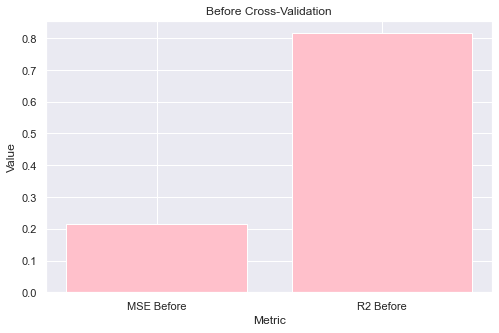

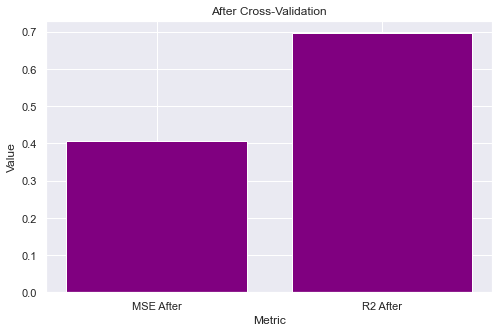

In [206]:
bar_labels = ['MSE Before', 'R2 Before']
bar_values = [mse_before, r2_before]
plt.bar(bar_labels, bar_values, color="pink")
plt.xlabel("Metric")
plt.ylabel("Value")
plt.title("Before Cross-Validation")
plt.show()
bar_labels = ['MSE After', 'R2 After']
bar_values = [mse_after, r2_after]
plt.bar(bar_labels, bar_values, color="purple")
plt.xlabel("Metric")
plt.ylabel("Value")
plt.title("After Cross-Validation")
plt.show()

### Exercici 5
#### No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

In [168]:
X1= house00.drop(["MEDV", "RM"], axis=1)
y1 = house00["MEDV"]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
columnes1 = house.columns.drop(["MEDV", "RM"])

In [169]:
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(404, 12) (102, 12) (404,) (102,)


Utilitzarem Random Forest Regressor

In [170]:
from sklearn.ensemble import RandomForestRegressor

In [171]:
RF= RandomForestRegressor(n_estimators = 300, max_depth = 8)
RF.fit(X_train1, y_train1)
y_pred_rf = RF.predict(X_test1)
y_pred_rf[:10]

array([ 0.37992238,  1.95502379, -0.51522561,  0.46654851, -0.60966758,
       -0.06090741, -0.25814681, -0.72644518, -0.02821835, -0.03696896])

In [172]:
importance = RF.feature_importances_
importance

array([0.04308033, 0.00766112, 0.01455265, 0.00138962, 0.02825748,
       0.02223122, 0.05815935, 0.00457842, 0.0284316 , 0.04778704,
       0.02239307, 0.72147809])

In [173]:
r2_RF= r2_score(y_test1, y_pred_rf )
print("R2 RF:", r2_RF)
mse_RF = mean_squared_error(y_test1, y_pred_rf )
print("MSE RF:", mse_RF)

R2 RF: 0.809342613554448
MSE RF: 0.21983474903763917


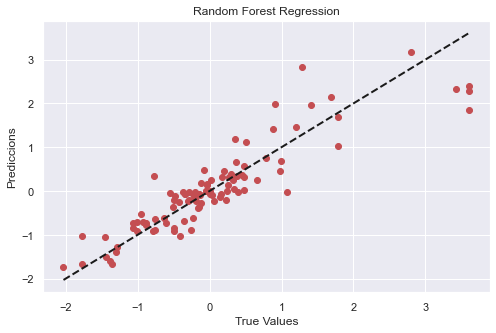

In [174]:
plt.plot(y_test1, y_pred_rf, 'ro')
plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], 'k--', lw=2)
plt.xlabel("True Values")
plt.ylabel("Prediccions")
plt.title("Random Forest Regression")
plt.show()

Creem una gràfica lineal amb una gràfica de dispersió de les prediccions i una línia de 45 graus que representa prediccions perfectes. Com més a prop estiguin els punts de la línia de 45 graus, millor serà el model per fer prediccions.

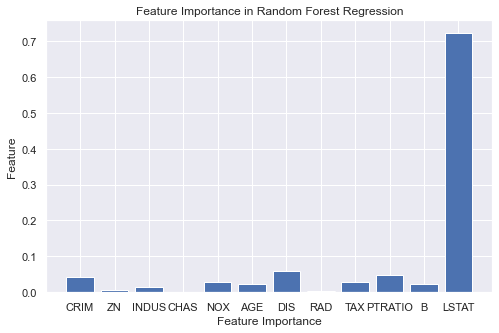

In [175]:
feature_importance = RF.feature_importances_
plt.bar(columnes1, feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Regression")
plt.show()

La que obte més importancia és LSTAT. 